# Self-Driving Car Engineer Nanodegree

## Deep Learning

## Project: Build a Traffic Sign Recognition Classifier

In this notebook, a template is provided for you to implement your functionality in stages, which is required to successfully complete this project. If additional code is required that cannot be included in the notebook, be sure that the Python code is successfully imported and included in your submission if necessary. 

> **Note**: Once you have completed all of the code implementations, you need to finalize your work by exporting the iPython Notebook as an HTML document. Before exporting the notebook to html, all of the code cells need to have been run so that reviewers can see the final implementation and output. You can then export the notebook by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission. 

In addition to implementing code, there is a writeup to complete. The writeup should be completed in a separate file, which can be either a markdown file or a pdf document. There is a [write up template](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md) that can be used to guide the writing process. Completing the code template and writeup template will cover all of the [rubric points](https://review.udacity.com/#!/rubrics/481/view) for this project.

The [rubric](https://review.udacity.com/#!/rubrics/481/view) contains "Stand Out Suggestions" for enhancing the project beyond the minimum requirements. The stand out suggestions are optional. If you decide to pursue the "stand out suggestions", you can include the code in this Ipython notebook and also discuss the results in the writeup file.


>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

---
## Step 0: Load The Data

In [1]:
import pickle
from sklearn.utils import shuffle
import numpy as np
import tensorflow as tf
import pandas as pd
from tensorflow.contrib.layers import flatten
import requests, zipfile, io, pickle

file_loc = _
r = requests.get("https://d17h27t6h515a5.cloudfront.net/topher/2017/February/5898cd6f_traffic-signs-data/traffic-signs-data.zip")
z = zipfile.ZipFile(io.BytesIO(r.content))

train = pickle.load(z.open('train.p'))
test = pickle.load(z.open('test.p'))
valid = pickle.load(z.open('valid.p'))

X_train, y_train = train['features'], train['labels']
X_test, y_test = test['features'], test['labels']
X_valid, y_valid = valid['features'], valid['labels']
signnames=pd.read_csv(file_loc +'signnames.csv').values[:,1]


---

## Step 1: Dataset Summary & Exploration

The pickled data is a dictionary with 4 key/value pairs:

- `'features'` is a 4D array containing raw pixel data of the traffic sign images, (num examples, width, height, channels).
- `'labels'` is a 1D array containing the label/class id of the traffic sign. The file `signnames.csv` contains id -> name mappings for each id.
- `'sizes'` is a list containing tuples, (width, height) representing the original width and height the image.
- `'coords'` is a list containing tuples, (x1, y1, x2, y2) representing coordinates of a bounding box around the sign in the image. **THESE COORDINATES ASSUME THE ORIGINAL IMAGE. THE PICKLED DATA CONTAINS RESIZED VERSIONS (32 by 32) OF THESE IMAGES**

Complete the basic data summary below. Use python, numpy and/or pandas methods to calculate the data summary rather than hard coding the results. For example, the [pandas shape method](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.shape.html) might be useful for calculating some of the summary results. 

### Provide a Basic Summary of the Data Set Using Python, Numpy and/or Pandas

In [7]:
import plotly
import plotly.plotly as py
import plotly.graph_objs as go


In [4]:
x=go.Histogram(x=y_valid)
data=[x]
layout = go.Layout(
title='Number of samples in Validation set per different sign type',
xaxis=dict(
        title='Traffic Sign class',
        titlefont=dict(
            family='Segoe UI',
            size=18,
            color='#050404'
            )
        ),
yaxis=dict(
    title='Samples',
    titlefont=dict(
    family='Segoe UI',
    size=18,
    color='#050404'
        )
    )
)
fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename='histogram')


In [5]:
x=go.Histogram(x=y_train)
data=[x]
layout = go.Layout(
title='Number of samples in training set per different sign type',
xaxis=dict(
        title='Traffic Sign class',
        titlefont=dict(
            family='Segoe UI',
            size=18,
            color='#050404'
            )
        ),
yaxis=dict(
    title='Samples',
    titlefont=dict(
    family='Segoe UI',
    size=18,
    color='#050404'
        )
    )
)
fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename='histogram')

In [6]:
x=go.Histogram(x=y_test)
data=[x]
layout = go.Layout(
title='Number of samples in Testing set per different sign type',
xaxis=dict(
        title='Traffic Sign class',
        titlefont=dict(
            family='Segoe UI',
            size=18,
            color='#050404'
            )
        ),
yaxis=dict(
    title='Samples',
    titlefont=dict(
    family='Segoe UI',
    size=18,
    color='#050404'
        )
    )
)
fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename='histogram')

### Include an exploratory visualization of the dataset

Visualize the German Traffic Signs Dataset using the pickled file(s). This is open ended, suggestions include: plotting traffic sign images, plotting the count of each sign, etc. 

The [Matplotlib](http://matplotlib.org/) [examples](http://matplotlib.org/examples/index.html) and [gallery](http://matplotlib.org/gallery.html) pages are a great resource for doing visualizations in Python.

**NOTE:** It's recommended you start with something simple first. If you wish to do more, come back to it after you've completed the rest of the sections. It can be interesting to look at the distribution of classes in the training, validation and test set. Is the distribution the same? Are there more examples of some classes than others?

Class 0: Speed limit (20km/h)                                180 samples


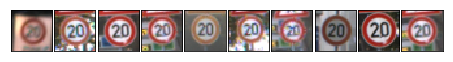

...............................................................

Class 1: Speed limit (30km/h)                                1980 samples


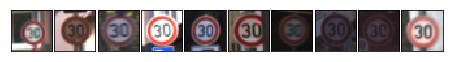

...............................................................

Class 2: Speed limit (50km/h)                                2010 samples


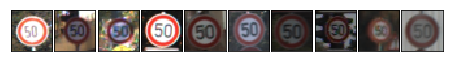

...............................................................

Class 3: Speed limit (60km/h)                                1260 samples


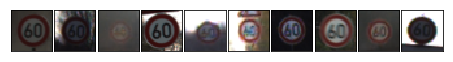

...............................................................

Class 4: Speed limit (70km/h)                                1770 samples


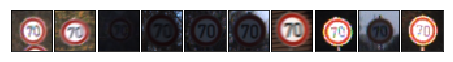

...............................................................

Class 5: Speed limit (80km/h)                                1650 samples


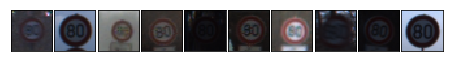

...............................................................

Class 6: End of speed limit (80km/h)                         360 samples


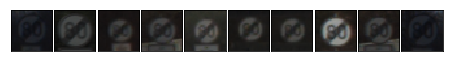

...............................................................

Class 7: Speed limit (100km/h)                               1290 samples


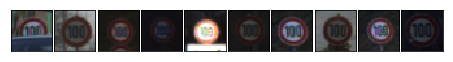

...............................................................

Class 8: Speed limit (120km/h)                               1260 samples


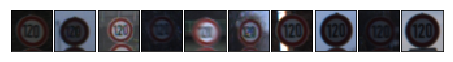

...............................................................

Class 9: No passing                                          1320 samples


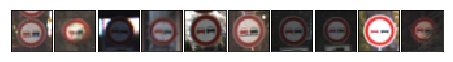

...............................................................

Class 10: No passing for vehicles over 3.5 metric tons        1800 samples


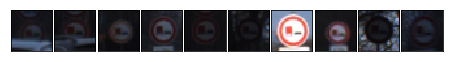

...............................................................

Class 11: Right-of-way at the next intersection               1170 samples


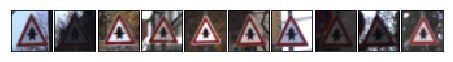

...............................................................

Class 12: Priority road                                       1890 samples


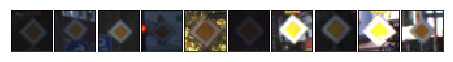

...............................................................

Class 13: Yield                                               1920 samples


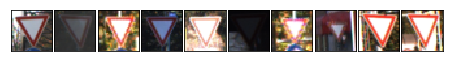

...............................................................

Class 14: Stop                                                690 samples


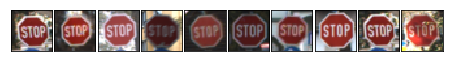

...............................................................

Class 15: No vehicles                                         540 samples


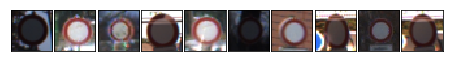

...............................................................

Class 16: Vehicles over 3.5 metric tons prohibited            360 samples


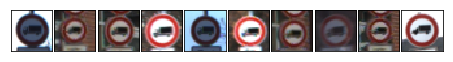

...............................................................

Class 17: No entry                                            990 samples


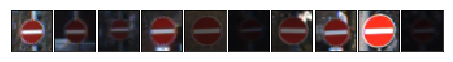

...............................................................

Class 18: General caution                                     1080 samples


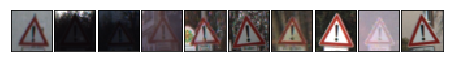

...............................................................

Class 19: Dangerous curve to the left                         180 samples


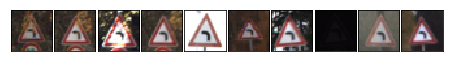

...............................................................

Class 20: Dangerous curve to the right                        300 samples


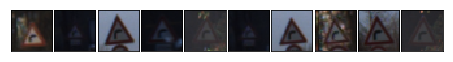

...............................................................

Class 21: Double curve                                        270 samples


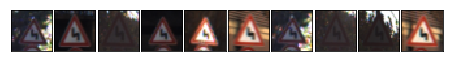

...............................................................

Class 22: Bumpy road                                          330 samples


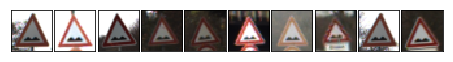

...............................................................

Class 23: Slippery road                                       450 samples


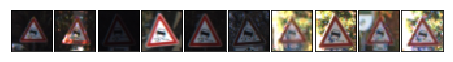

...............................................................

Class 24: Road narrows on the right                           240 samples


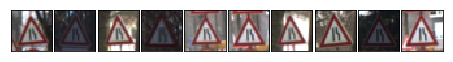

...............................................................

Class 25: Road work                                           1350 samples


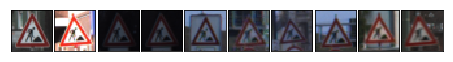

...............................................................

Class 26: Traffic signals                                     540 samples


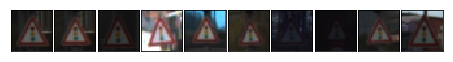

...............................................................

Class 27: Pedestrians                                         210 samples


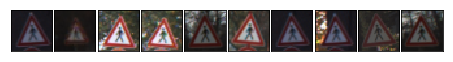

...............................................................

Class 28: Children crossing                                   480 samples


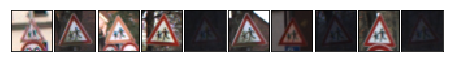

...............................................................

Class 29: Bicycles crossing                                   240 samples


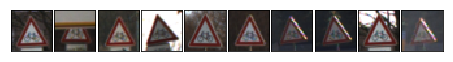

...............................................................

Class 30: Beware of ice/snow                                  390 samples


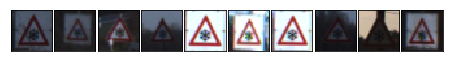

...............................................................

Class 31: Wild animals crossing                               690 samples


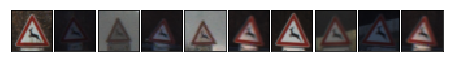

...............................................................

Class 32: End of all speed and passing limits                 210 samples


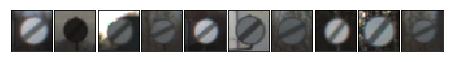

...............................................................

Class 33: Turn right ahead                                    599 samples


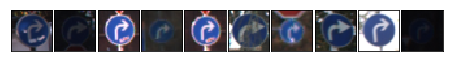

...............................................................

Class 34: Turn left ahead                                     360 samples


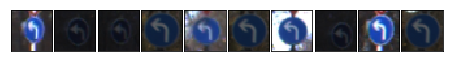

...............................................................

Class 35: Ahead only                                          1080 samples


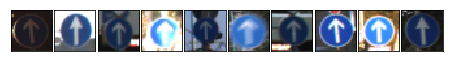

...............................................................

Class 36: Go straight or right                                330 samples


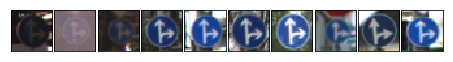

...............................................................

Class 37: Go straight or left                                 180 samples


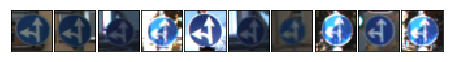

...............................................................

Class 38: Keep right                                          1860 samples


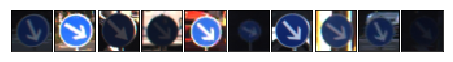

...............................................................

Class 39: Keep left                                           270 samples


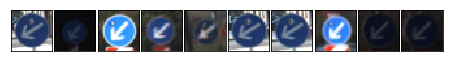

...............................................................

Class 40: Roundabout mandatory                                300 samples


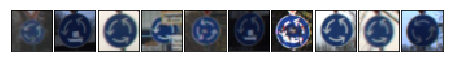

...............................................................

Class 41: End of no passing                                   210 samples


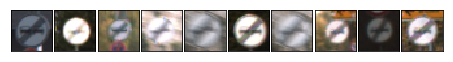

...............................................................

Class 42: End of no passing by vehicles over 3.5 metric tons  210 samples


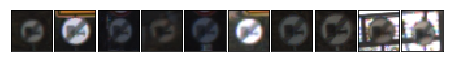

...............................................................



In [8]:
#Number of examples for sign classes in the training set
import random
from matplotlib import pyplot

col_width = max(len(name) for name in signnames)
sign_classes, class_indices, class_counts = np.unique(y_train, return_index = True, return_counts = True)


for c, c_index, c_count in zip(sign_classes, class_indices, class_counts):
    print("Class %i: %-*s  %s samples" % (c, col_width, signnames[c], str(c_count)))
    fig = pyplot.figure(figsize = (6, 1))
    fig.subplots_adjust(left = 0, right = 1, bottom = 0, top = 1, hspace = 0.05, wspace = 0.05)
    random_indices = random.sample(range(c_index, c_index + c_count), 10)
    for i in range(10):
        axis = fig.add_subplot(1, 10, i + 1, xticks=[], yticks=[])
        axis.imshow(X_train[random_indices[i]])
    pyplot.show()
    print("...............................................................\n")

----

## Step 2: Design and Test a Model Architecture

Design and implement a deep learning model that learns to recognize traffic signs. Train and test your model on the [German Traffic Sign Dataset](http://benchmark.ini.rub.de/?section=gtsrb&subsection=dataset).

The LeNet-5 implementation shown in the [classroom](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) at the end of the CNN lesson is a solid starting point. You'll have to change the number of classes and possibly the preprocessing, but aside from that it's plug and play! 

With the LeNet-5 solution from the lecture, you should expect a validation set accuracy of about 0.89. To meet specifications, the validation set accuracy will need to be at least 0.93. It is possible to get an even higher accuracy, but 0.93 is the minimum for a successful project submission. 

There are various aspects to consider when thinking about this problem:

- Neural network architecture (is the network over or underfitting?)
- Play around preprocessing techniques (normalization, rgb to grayscale, etc)
- Number of examples per label (some have more than others).
- Generate fake data.

Here is an example of a [published baseline model on this problem](http://yann.lecun.com/exdb/publis/pdf/sermanet-ijcnn-11.pdf). It's not required to be familiar with the approach used in the paper but, it's good practice to try to read papers like these.

### Pre-process the Data Set (normalization, grayscale, etc.)

Minimally, the image data should be normalized so that the data has mean zero and equal variance. For image data, `(pixel - 128)/ 128` is a quick way to approximately normalize the data and can be used in this project. 

Other pre-processing steps are optional. You can try different techniques to see if it improves performance. 

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project.

In [9]:
### Preprocess the data here. It is required to normalize the data. Other preprocessing steps could include
# Normalise input (images still in colour)
X_train = (X_train - X_train.mean()) / (np.max(X_train) - np.min(X_train))
X_test = (X_test - X_test.mean()) / (np.max(X_test) - np.min(X_test))
X_valid= (X_valid - X_valid.mean()) / (np.max(X_valid) - np.min(X_valid))

### Model Architecture

In [10]:
### Define your architecture here.
EPOCHS = 101
BATCH_SIZE = 128


def LeNet(x):
    # Arguments used for tf.truncated_normal, randomly defines variables for the weights and biases for each layer
    mu = 0
    sigma = 0.1

    #Layer 1: Convolutional. Input = 32x32x1. Output = 28x28x6.
    conv1_W = tf.Variable(tf.truncated_normal(shape=(5, 5, 3, 6), mean=mu, stddev=sigma))
    conv1_b = tf.Variable(tf.zeros(6))
    conv1 = tf.nn.conv2d(x, conv1_W, strides=[1, 1, 1, 1], padding='VALID') + conv1_b

    #Activation.
    conv1 = tf.nn.relu(conv1)

    #Pooling. Input = 28x28x6. Output = 14x14x6.
    conv1 = tf.nn.max_pool(conv1, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')

    #Layer 2: Convolutional. Output = 10x10x16.
    conv2_W = tf.Variable(tf.truncated_normal(shape=(5, 5, 6, 16), mean=mu, stddev=sigma))
    conv2_b = tf.Variable(tf.zeros(16))
    conv2 = tf.nn.conv2d(conv1, conv2_W, strides=[1, 1, 1, 1], padding='VALID') + conv2_b

    #Activation.
    conv2 = tf.nn.relu(conv2)

    #Pooling. Input = 10x10x16. Output = 5x5x16.
    conv2 = tf.nn.max_pool(conv2, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')

    #Flatten. Input = 5x5x16. Output = 400.
    fc0 = flatten(conv2)

    #Layer 3: Fully Connected. Input = 400. Output = 120.
    fc1_W = tf.Variable(tf.truncated_normal(shape=(400, 120), mean=mu, stddev=sigma))
    fc1_b = tf.Variable(tf.zeros(120))
    fc1 = tf.matmul(fc0, fc1_W) + fc1_b

    #Activation.
    fc1 = tf.nn.relu(fc1)

    #Layer 4: Fully Connected. Input = 120. Output = 84.
    fc2_W = tf.Variable(tf.truncated_normal(shape=(120, 84), mean=mu, stddev=sigma))
    fc2_b = tf.Variable(tf.zeros(84))
    fc2 = tf.matmul(fc1, fc2_W) + fc2_b

    #Activation.
    fc2 = tf.nn.relu(fc2)

    #Layer 5: Fully Connected. Input = 84. Output = 10.
    fc3_W = tf.Variable(tf.truncated_normal(shape=(84, 43), mean=mu, stddev=sigma))
    fc3_b = tf.Variable(tf.zeros(43))
    logits = tf.matmul(fc2, fc3_W) + fc3_b

    return logits


### Train, Validate and Test the Model

A validation set can be used to assess how well the model is performing. A low accuracy on the training and validation
sets imply underfitting. A high accuracy on the training set but low accuracy on the validation set implies overfitting.

In [11]:
x = tf.placeholder(tf.float32, (None, 32, 32, 3))
y = tf.placeholder(tf.int32, (None))
one_hot_y = tf.one_hot(y, 43)

rate = 0.001

logits = LeNet(x)
cross_entropy = tf.nn.softmax_cross_entropy_with_logits(labels=one_hot_y, logits=logits)
loss_operation = tf.reduce_mean(cross_entropy)
optimizer = tf.train.AdamOptimizer(learning_rate = rate)
training_operation = optimizer.minimize(loss_operation)

correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(one_hot_y, 1))
accuracy_operation = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
saver = tf.train.Saver()

In [12]:
def evaluate(X_data, y_data):
    num_examples = len(X_data)
    total_accuracy = 0
    sess = tf.get_default_session()
    for offset in range(0, num_examples, BATCH_SIZE):
        batch_x, batch_y = X_data[offset:offset+BATCH_SIZE], y_data[offset:offset+BATCH_SIZE]
        accuracy = sess.run(accuracy_operation, feed_dict={x: batch_x, y: batch_y})
        total_accuracy += (accuracy * len(batch_x))
    return total_accuracy / num_examples

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    num_examples = len(X_train)

    print("Training...")
    print()
    for i in range(EPOCHS):
        X_train, y_train = shuffle(X_train, y_train)
        for offset in range(0, num_examples, BATCH_SIZE):
            end = offset + BATCH_SIZE
            batch_x, batch_y = X_train[offset:end], y_train[offset:end]
            sess.run(training_operation, feed_dict={x: batch_x, y: batch_y})

        if i % 10 == 0:
            validation_accuracy = evaluate(X_valid, y_valid)
            print("EPOCH {} ...".format(i + 1))
            print("Validation Accuracy = {:.3f}".format(validation_accuracy))
            print()
    saver.save(sess, './lenet')
    print("Model saved")

Training...

EPOCH 1 ...
Validation Accuracy = 0.698

EPOCH 11 ...
Validation Accuracy = 0.910

EPOCH 21 ...
Validation Accuracy = 0.929

EPOCH 31 ...
Validation Accuracy = 0.931

EPOCH 41 ...
Validation Accuracy = 0.921

EPOCH 51 ...
Validation Accuracy = 0.938

EPOCH 61 ...
Validation Accuracy = 0.937

EPOCH 71 ...
Validation Accuracy = 0.937

EPOCH 81 ...
Validation Accuracy = 0.937

EPOCH 91 ...
Validation Accuracy = 0.931

EPOCH 101 ...
Validation Accuracy = 0.937

Model saved


### Prediction on Test Set

In [13]:
with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('.'))
    test_accuracy = evaluate(X_test, y_test)
    print("Test Accuracy = {:.3f}".format(test_accuracy))

INFO:tensorflow:Restoring parameters from .\lenet
Test Accuracy = 0.929


 ### Step 3: Test a Model on New Images

To give yourself more insight into how your model is working, download at least five pictures of German traffic signs from the web and use your model to predict the traffic sign type.

You may find signnames.csv useful as it contains mappings from the class id (integer) to the actual sign name.

### Predict the Sign Type for Each Image


### Analyze Performance

c:\python\lib\site-packages\skimage\transform\_warps.py:84: UserWarning:

The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.

c:\python\lib\site-packages\skimage\transform\_warps.py:84: UserWarning:

The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.

c:\python\lib\site-packages\skimage\transform\_warps.py:84: UserWarning:

The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.

c:\python\lib\site-packages\skimage\transform\_warps.py:84: UserWarning:

The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.

c:\python\lib\site-packages\skimage\transform\_warps.py:84: UserWarning:

The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.



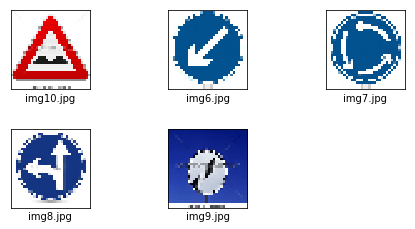

In [17]:
### Load the images and plot them here.
import os
from skimage.transform import resize
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline
ImgPath = _
file=os.listdir(ImgPath)
fig = plt.figure(figsize=(8,8))
fig.subplots_adjust(hspace=0.5)

for index,filename in enumerate(file):
    image = mpimg.imread(ImgPath + str(filename))
    ax = fig.add_subplot(4,3,index+1)
    ax.set_xlabel(filename)
    image_resize = resize(image, (32, 32))
    plt.imshow(image_resize)
    ax.set_yticklabels([])
    ax.set_xticklabels([])
    for tic in ax.xaxis.get_major_ticks():
        tic.tick1On = tic.tick2On = False
        tic.label1On = tic.label2On = False
    for tic in ax.yaxis.get_major_ticks():
        tic.tick1On = tic.tick2On = False
        tic.label1On = tic.label2On = False


### Output Top 5 Softmax Probabilities For Each Image Found on the Web

INFO:tensorflow:Restoring parameters from .\lenet
img10.jpg


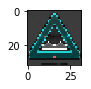

 Class_id:22  confidence:100%
 Class_id:29  confidence:0%
 Class_id:31  confidence:0%
 Class_id:28  confidence:0%
 Class_id: 1  confidence:0%
img6.jpg


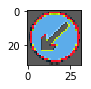

 Class_id:39  confidence:100%
 Class_id:33  confidence:0%
 Class_id:37  confidence:0%
 Class_id: 0  confidence:0%
 Class_id: 1  confidence:0%
img7.jpg


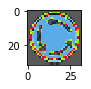

 Class_id:40  confidence:100%
 Class_id:32  confidence:0%
 Class_id:34  confidence:0%
 Class_id:35  confidence:0%
 Class_id:12  confidence:0%
img8.jpg


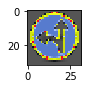

 Class_id:37  confidence:100%
 Class_id:26  confidence:0%
 Class_id:34  confidence:0%
 Class_id:38  confidence:0%
 Class_id:40  confidence:0%
img9.jpg


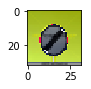

 Class_id:32  confidence:100%
 Class_id:41  confidence:0%
 Class_id: 6  confidence:0%
 Class_id:20  confidence:0%
 Class_id:36  confidence:0%


In [18]:
import cv2
with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('.'))
    predictions =[]
    ImgPath = _
    file=os.listdir(ImgPath)
    for index,filename in enumerate(file):
        image = mpimg.imread(ImgPath + str(filename))
        dim = (32, 32)
        image = cv2.resize(image, dim, interpolation = cv2.INTER_AREA)
        image = (image - image.mean()) / (np.max(image) - np.min(image))
        test_prediction = tf.nn.softmax(logits)
        classification = sess.run(test_prediction,feed_dict = {x: [image]})
        test_class = sess.run(tf.argmax(classification,1))
        value,indices = sess.run(tf.nn.top_k(tf.constant(classification), k=5))
        predict_confidence=value.squeeze()
        indices = indices.squeeze()
        print(filename)
        fig = plt.figure(figsize=(1,1))
        plt.imshow(image)
        plt.show()
        plt.axis('off')
        for j in range(0,5):
            print ( ' Class_id:{0:2d}  confidence:{1:.0%}'.format((indices[j]),(predict_confidence[j])))
        plt.close()


### Project Writeup

Once you have completed the code implementation, document your results in a project writeup using this [template](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md) as a guide. The writeup can be in a markdown or pdf file. 

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.